In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

In [2]:
sys.path.append("C:/Users/User/Desktop/hopfield-izhikevich/hopfield/")
from hopfield import Hopfield
sys.path.pop();

In [3]:
dataset_iter = tfds.as_numpy(tfds.load('mnist', split='train', shuffle_files=True, as_supervised=True))
dataset = np.fromiter(dataset_iter, dtype=tuple)

In [4]:
digits = [[] for i in range(10)]
index = 0
for d in dataset:
    digits[d[1]].append(index)
    index += 1

In [5]:
memory_images = []
scale = 0.6 # scaling into image 
threshold = 100 # binary image threshold 
shape = ()
for digit in range(10):
    index = random.choice(digits[ digit ])
    image = tf.image.central_crop(dataset[index][0], scale)
    image = tf.where(image>threshold, 1, 0)
    memory_images.append(image.numpy().flatten())

    
shape = tuple(image.shape)[:2]
memory_images = np.array(memory_images, dtype=np.float32)*2-1


In [6]:
index = random.choice(digits[ 6 ]) # choosing random image of '6'
image = tf.image.central_crop(dataset[index][0], scale)
image = tf.where(image>threshold, 1, 0)
image = image.numpy().flatten()
image = np.array(image, np.float32)*2-1

In [7]:
model = Hopfield()
model.train(memory_images)

In [8]:
result = model.run(image)

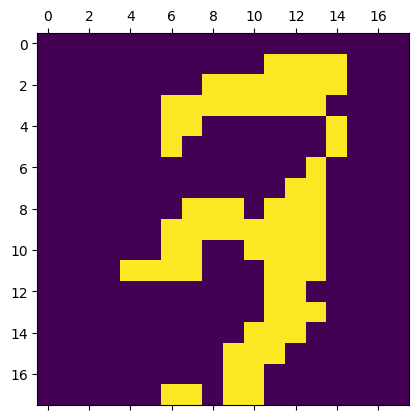

In [9]:
plt.matshow(np.resize(result['output'], shape))